In [1]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Correct number of pieces on board
0000100000000010000000001000000000000000000100000000011111000001000000001111000000110000000010000000


Text(0.5, 1.0, 'Battleship Board')

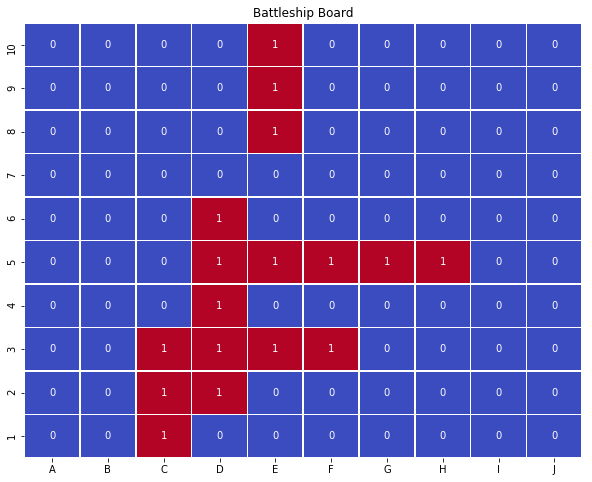

In [2]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d', cbar=False)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Battleship Board')

In [3]:
# initialize the first random generation
generation_size = 10
gene_pool = ga.random_generation(generation_size, 100)

# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.20
gene_pool = ga.assign_elites(gene_pool, elite_rate)
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
1,2,1100010011000110011000110100110100101101000101...,1,Random,0.57,0,True
5,6,0010001101100011011011101000110000001000100011...,1,Random,0.57,0,True
8,9,1011000100101010010100001010000011110000111001...,1,Random,0.56,0,False
0,1,1001100111101000011001101110011000110010010111...,1,Random,0.50,0,False
3,4,1101011110000110000001000101100011001010100110...,1,Random,0.48,0,False
7,8,0000010000111101100101111001100101101001110001...,1,Random,0.48,0,False
6,7,1010011101011111000110000101010001101111000011...,1,Random,0.47,0,False
4,5,1011001000101100100100110111101000010110001000...,1,Random,0.46,0,False
9,10,0100100011011101100100011000101011101110001111...,1,Random,0.44,0,False
2,3,0100010010100011011111110011010100111111101111...,1,Random,0.38,0,False


In [ ]:
gene_pool.describe()

In [6]:
# select elites with elite rate
next_generation = ga.select_elites(gene_pool)

# add mutants to generation
mutant_rate = 0.20
bit_flip_rate = 0.05
n_mutants = int(mutant_rate * generation_size)
next_generation = ga.create_mutants(next_generation, n_mutants, bit_flip_rate)

# add splice pairs to generation
splice_pair_rate = elite_rate / 2
n_splice_pairs = int(splice_pair_rate * generation_size)
next_generation = ga.create_splices(next_generation, n_splice_pairs)

# compare fitness
next_generation['Fitness'] = next_generation.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)
next_generation

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
0,11,1100010011000110011000110100110100101101000101...,2,Elitism,0.57,2,False
1,12,0010001101100011011011101000110000001000100011...,2,Elitism,0.57,6,False
2,13,1100010111000110111000110100110100101101000101...,2,Mutation,0.54,11,False
3,14,0010001101100011011011101000110001001010000011...,2,Mutation,0.56,12,False
4,15,1100010011000110011000110100110100101101000101...,2,Splice Pair,0.58,"[11, 12]",False
5,15,0010001101100011011011101000110000001000100011...,2,Splice Pair,0.56,"[11, 12]",False


In [ ]:
gene_pool = gene_pool.append(next_generation)
gene_pool

In [ ]:
# terminate

In [ ]:
# heuristics